

# Project: No-show appointments


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.
 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline 
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01  9% |███                             | 983kB 25.0MB/s eta 0:00:01    22% |███████▏                        | 2.3MB 28.8MB/s eta 0:00:01    33% |██████████▉                     | 3.5MB 28.6MB/s eta 0:00:01    85% |███████████████████████████▎    | 8.9MB 28.4MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.6MB/s eta 0:00:01   28% |█████████                       | 3.8MB 25.9MB/s eta 0:00:01    37% |████████████▏                   | 5.1MB 25.1MB/s eta 0:00:01    56% |██████████████████▏             | 7.6MB 26.1MB/s eta 0:00:01    84% |███████████████████████████     | 11.3MB 26.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninst

<a id='wrangling'></a>
## Data Wrangling

 is the process of cleaning and unifying messy and complex data sets for easy access and analysis


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

the data have 110527 ids of patients and 14 columns

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


there is a mistake will calculating the minimum age[-1]

In [5]:
mask=df.query('Age=="-1"')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


the mistake is in id 99832 and must be removed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there is no missing values

In [7]:
df.duplicated().sum()

0

there is no duplicates

In [8]:
df['PatientId'].duplicated().sum()

48228

there are duplicated patients id

In [9]:
df.duplicated(['PatientId','No-show']).sum()

38710

there are 38710 data must be removed


### Data Cleaning

is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.


In [10]:
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape

(71817, 14)

the duplicates removed

In [11]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'], axis = 1, inplace =True )
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

the critical process of performing initial investigations on data so as to discover patterns

# draw a general histogram of the available data

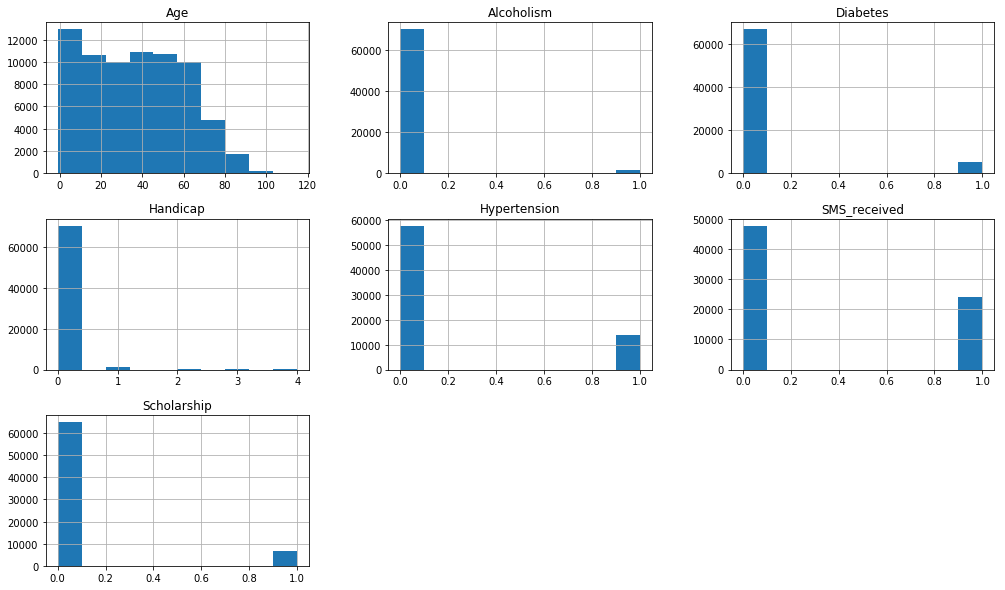

In [13]:
df.hist(figsize=(17,10));

most of people who attend don't suffer from hypertension,diabates and alcoholism

and the majorty didn't recieve sms


# What factors that make the patients attend?

In [14]:
attended = df.No_show == 'No'
absent = df.No_show == 'Yes'
df[attended].count(),df[absent].count()

(Gender           54154
 Age              54154
 Neighbourhood    54154
 Scholarship      54154
 Hypertension     54154
 Diabetes         54154
 Alcoholism       54154
 Handicap         54154
 SMS_received     54154
 No_show          54154
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handicap         17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

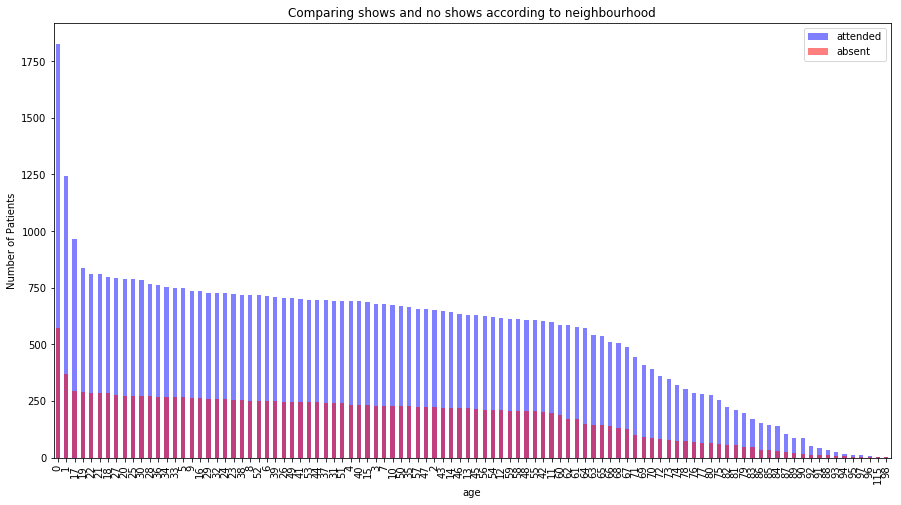

In [15]:
plt.figure(figsize=[15,8])
df.Age[attended].value_counts().plot (kind = 'bar', alpha = 0.5, color= 'blue', label = 'attended')
df.Age[absent].value_counts().plot (kind = 'bar', alpha = 0.5, color= 'red', label = 'absent')

plt.legend()
plt.title('Comparing shows and no shows according to neighbourhood')
plt.xlabel('age')
plt.ylabel('Number of Patients');

the attendence is high in the small ages

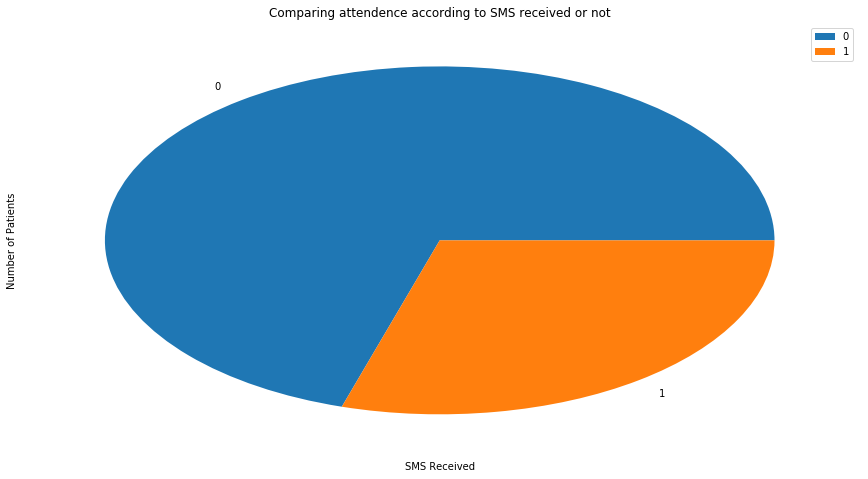

In [16]:
def attendence (df,col_name,show,notshow):
    plt.figure(figsize=[15,8])
    df[col_name][attended].value_counts(normalize=True).plot(kind='Pie', label = 'attended')
    plt.legend()
    plt.title('Comparing attendence according to SMS received or not')
    plt.xlabel('SMS Received')
    plt.ylabel('Number of Patients');
attendence (df,'SMS_received',attended,absent)

as shown number of an recieved sms patients attended than who received

<a id='conclusions'></a>
## Conclusions
the small ages attend than the larger


there is a problem on the sms and must be revised



In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0